In [1]:
import glob
import os
import math
from decimal import Decimal
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
import matplotlib.colors
import matplotlib.cm
import pandas as pd
import numpy as np
import time

#Enter path to run directory where NuGrid data is stored (must contain isotopedatabase.txt and iso_massf files)
path = '/shared/storage/physnp/ahs539/Nugrid/NuPPN/frames/ppn/Full_iniab_CE_runs/15M_32e-5_early_phase/f1a5mcr1.5md32e-5/N_Traj_rmin=1.0422E+06/'
#enter a name for saving figures
run_name = 'test'
save_path = 'path/to/save/directory'
#save figure? 
save_figure = False #False/True

In [2]:
ZtoSym = {0:'Nn', 1:'H', 2:'He', 3:'Li', 4:'Be', 5:'B', 6:'C', 7:'N', 8:'O', 9:'F',
10:'Ne', 11:'Na', 12:'Mg', 13:'Al', 14:'Si', 15:'P', 16:'S', 17:'Cl', 18:'Ar',
19:'K', 20:'Ca', 21:'Sc', 22:'Ti', 23:'V', 24:'Cr', 25:'Mn', 26:'Fe', 27:'Co',
28:'Ni', 29:'Cu', 30:'Zn', 31:'Ga', 32:'Ge', 33:'As', 34:'Se', 35:'Br', 36:'Kr',
37:'Rb', 38:'Sr', 39:'Y', 40:'Zr', 41:'Nb', 42:'Mo', 43:'Tc', 44:'Ru', 45:'Rh',
46:'Pd', 47:'Ag', 48:'Cd', 49:'In', 50:'Sn', 51:'Sb', 52:'Te', 53:'I', 54:'Xe',
55:'Cs', 56:'Ba', 57:'La', 58:'Ce', 59:'Pr', 60:'Nd', 61:'Pm', 62:'Sm', 63:'Eu',
64:'Gd', 65:'Tb', 66:'Dy', 67:'Ho', 68:'Er', 69:'Tm', 70:'Yb', 71:'Lu', 72:'Hf',
73:'Ta', 74:'W', 75:'Re', 76:'Os', 77:'Ir', 78:'Pt', 79:'Au', 80:'Hg', 81:'Tl',
82:'Pb', 83:'Bi', 84:'Po', 85:'At', 86:'Rn', 87:'Fr', 88:'Ra', 89:'Ac', 90:'Th',
91:'Pa', 92:'U', 93:'Np', 94:'Pu', 95:'Am', 96:'Cm', 97:'Bk', 98:'Cf', 99:'Es',
100:'Fm', 101:'Md', 102:'No', 103:'Lr', 104:'Rf', 105:'Db', 106:'Sg', 107:'Bh',
108:'Hs', 109:'Mt', 110:'Ds', 111:'Rg', 112:'Cn', 113:'Nh', 114:'Fl', 115:'Mc',
116:'Lv', 117:'Ts', 118:'Og', 119:'Ze', 120:'Zf', 121:'Zg', 122:'Zh', 123:'Zi',
124:'Zj', 125:'Zk', 126:'Zl', 127:'Zm', 128:'Yn', 129:'Zo', 130:'Zp', 131:'Zq',
132:'Yr', 133:'Zs', 134:'Zt', 135:'Zu', 136:'Zv', 137:'Zw', 138:'Zx', 139:'Zy',
140:'Zz'}

SymtoZ = {value: key for key, value in ZtoSym.items()}

def ZtoSymbol(Z):
    if Z in ZtoSym:
        return ZtoSym[Z]
    else:
        return f"No conversion found for {Z}"

def SymboltoZ(element):
    element_lower = re.sub(r'\d', '', element.strip().lower())
    for number, symbol in ZtoSym.items():
        if len(element.strip()) == 1:
            if element.strip() == 'p':
                return '1'
            if element.strip() == 'd':
                return '1'
            if element.strip() == 't':
                return '1'
            if element.strip() == 'nn':
                return '0'
          
    for number, symbol in ZtoSym.items():
        if symbol.lower() == element_lower:
            return number
        elif element_lower == 'al-':
            return '13'
        elif element_lower == 'al*':
            return '13'
    return None

In [3]:
All_iso_mass = []

list1 = sorted(os.listdir(path))
iso_dat = [z for z in list1 if z.startswith('iso_massf')]
for i in iso_dat:
    isotope_mf = pd.read_csv(path + '/' + i, sep='\s+',
                      skiprows = 7, header = None,
                      usecols =[x for x in range(0,5)], dtype='string')
    #Convert to a list. 
    mass_in_list = isotope_mf.values.tolist()
    All_iso_mass.append(mass_in_list)
Initial_iso_MF = All_iso_mass[0]

In [4]:
All_element_MF = []
for i in All_iso_mass:
    K = 0
    ele_MF_one_timestep = []
    for K in range(84):
        element_mass = 0
        for j in i:
            if float(j[1]) == K:
                element_mass = element_mass + float(j[-1])
        element_data = [K, element_mass, ZtoSymbol(K)]
        ele_MF_one_timestep.append(element_data)
    All_element_MF.append(ele_MF_one_timestep)
print('The total number of printed timesteps from this run is: \n' + str(len(All_element_MF)))
print('You can chose to plot specific timesteps between 0 and ' + str(len(All_element_MF)) + ' in the next section')

The total number of printed timesteps from this run is: 
35
You can chose to plot specific timesteps between 0 and 35 in the next section


# Elemental mass fraction plots

In [5]:
import random

def generate_colors(n):
    colors = set()
    while len(colors) < n:
        color = "#{:06x}".format(random.randint(0, 0xFFFFFF))  # Generate a random hex color
        colors.add(color)
    return list(colors)

colors = generate_colors(len(All_element_MF[0]))
print(colors)

['#cda593', '#7b1db8', '#375edc', '#521d3b', '#d53d91', '#5da709', '#bfae20', '#aea87d', '#2203b5', '#dd5980', '#650771', '#ef56b1', '#ee7a1b', '#b8f329', '#36a2b1', '#95ceb4', '#68e001', '#bee37a', '#838b0d', '#1d575a', '#8f50f1', '#24e2b8', '#d77c35', '#fc2bd8', '#35a362', '#02e9cf', '#a5d5ca', '#7f46af', '#68e166', '#d76815', '#83c671', '#40a22f', '#48891e', '#cbdb25', '#207b36', '#50259b', '#5075dd', '#fbb28e', '#d3317b', '#c3d348', '#189809', '#8e7018', '#f184ec', '#981005', '#7ec91b', '#b508ea', '#417c24', '#f30145', '#697ecd', '#774177', '#2f47a9', '#3269cd', '#59fc65', '#e544fc', '#ff77ad', '#e58ec4', '#3a9126', '#797a2c', '#6a3d3d', '#54fc22', '#1e6cd4', '#e56dec', '#14ccf6', '#2687c1', '#b55ae7', '#20f653', '#7675bc', '#f6db02', '#5575cf', '#c2f700', '#add1be', '#4578ce', '#35a9e2', '#77c97c', '#ef8e47', '#598cdf', '#affa29', '#9b5934', '#17d2c2', '#24b9bd', '#405044', '#ef0bab', '#b97f3f', '#8734b2']


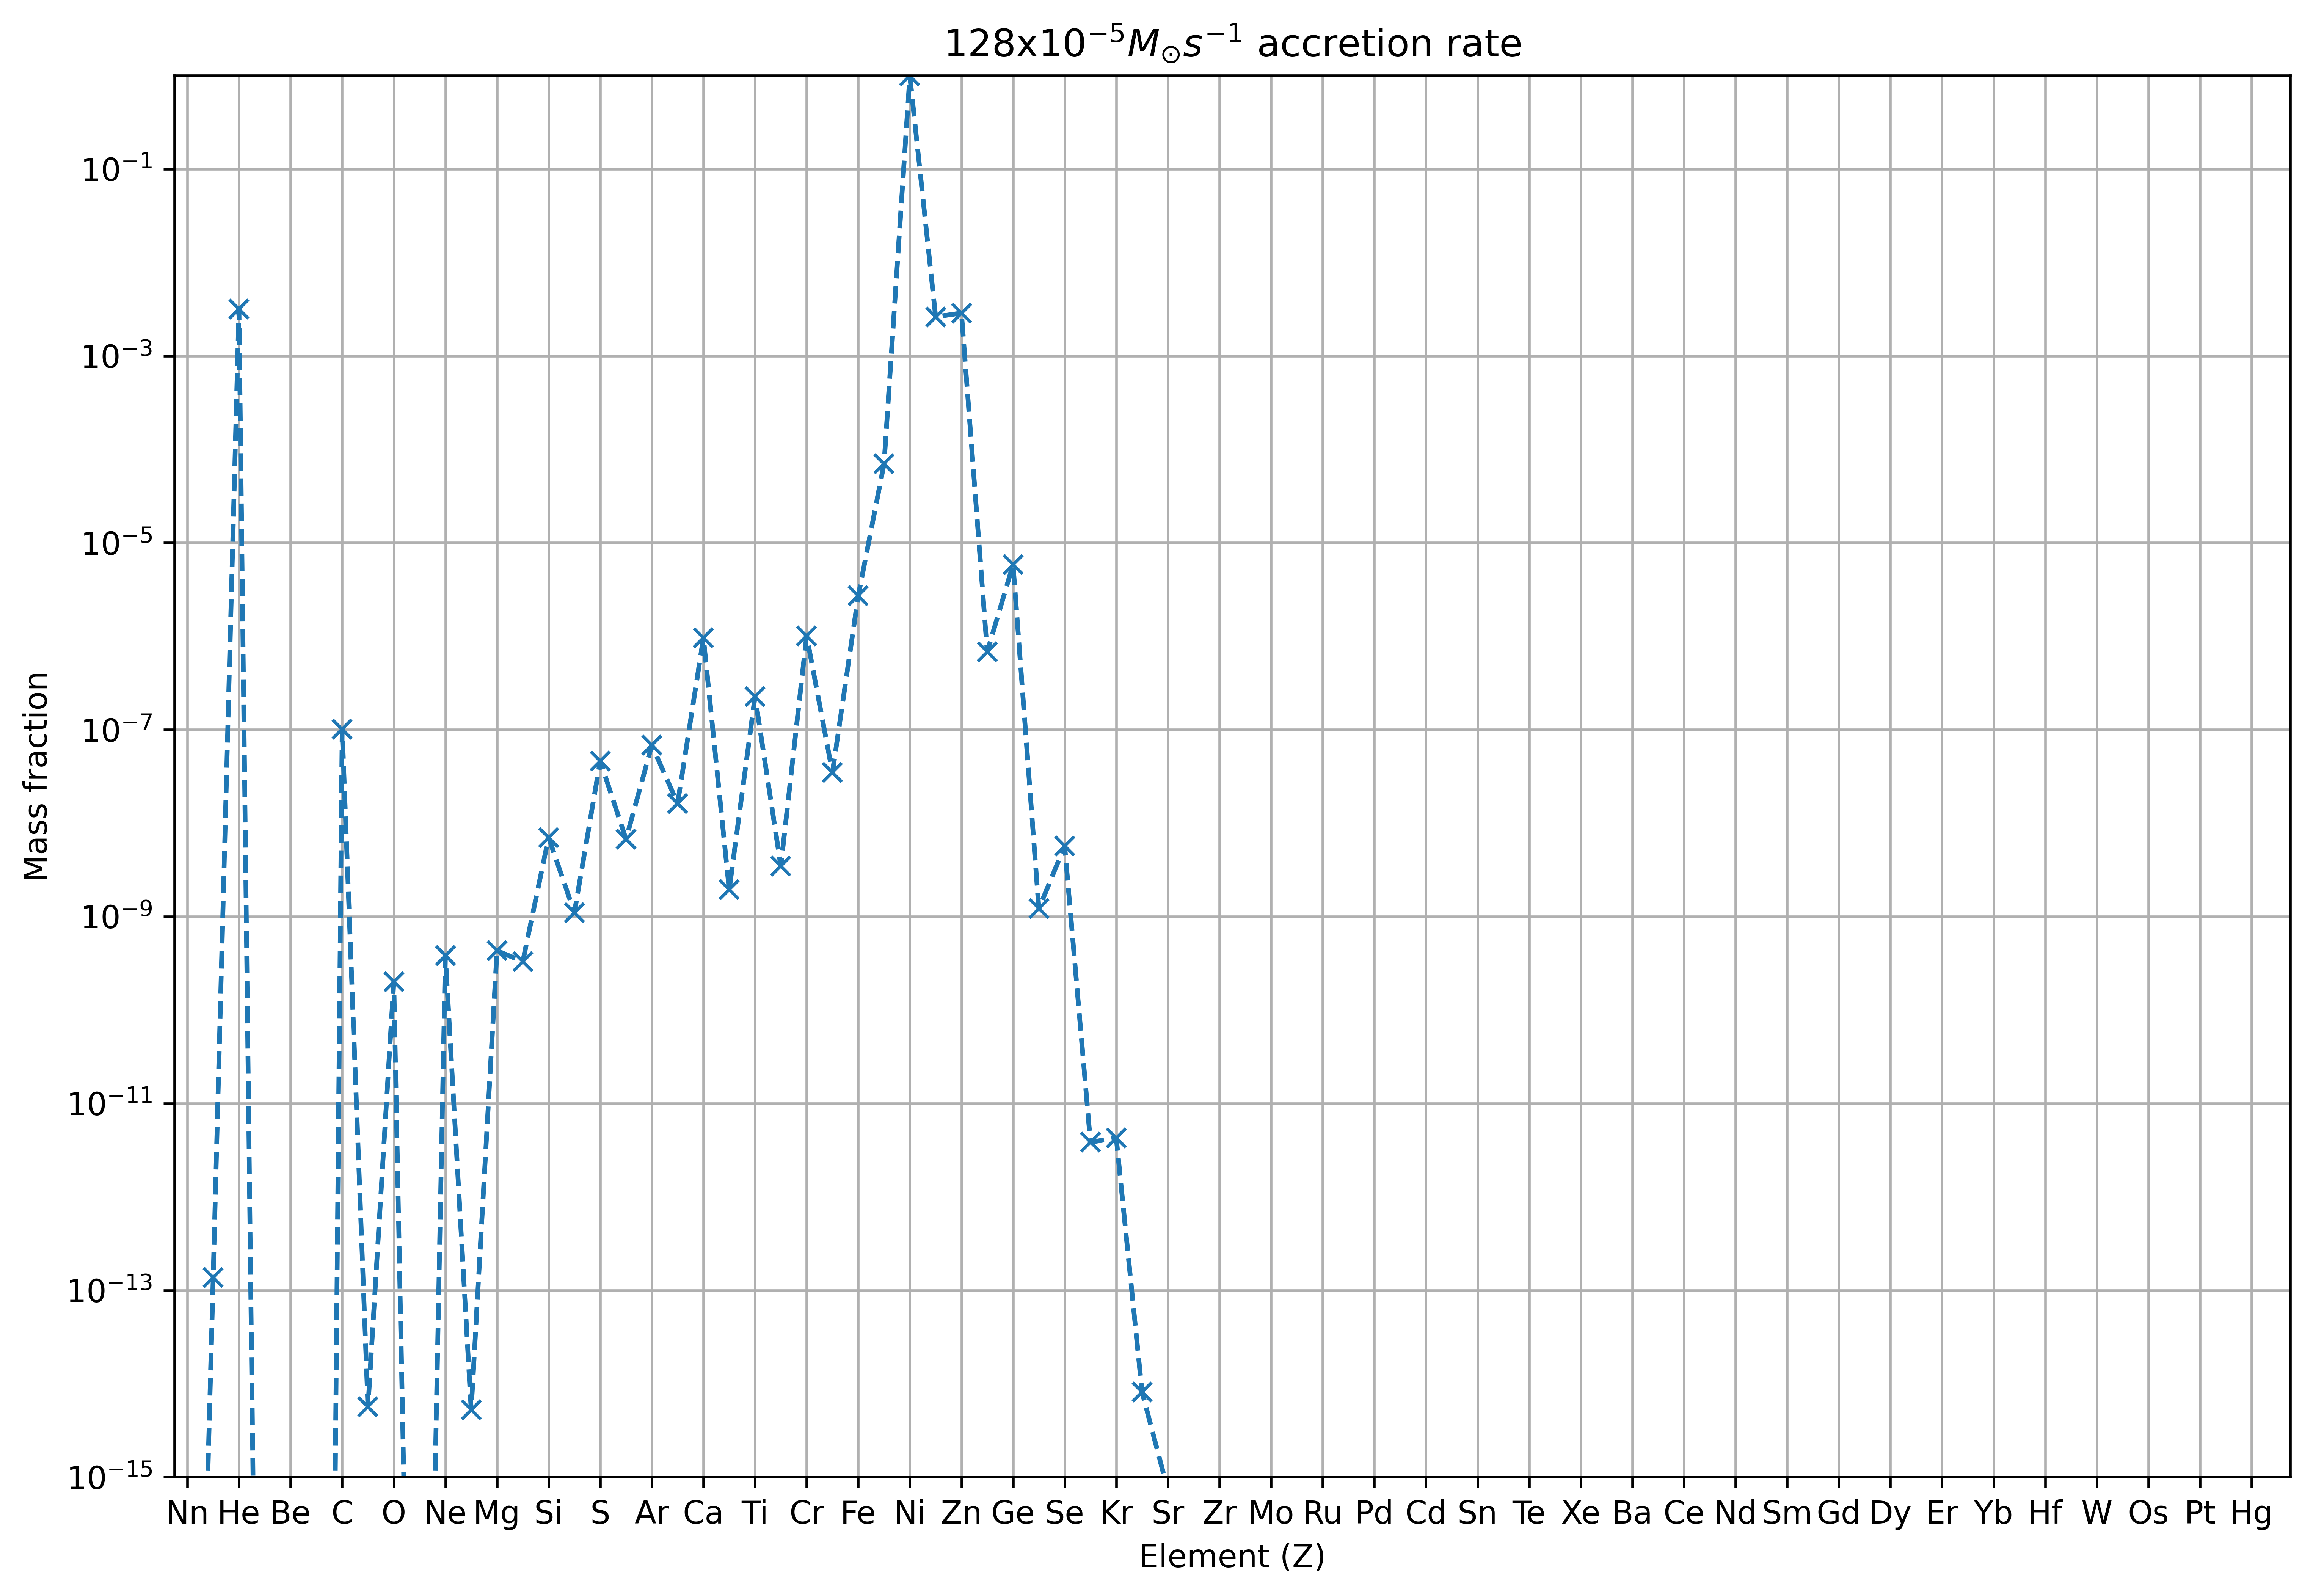

In [6]:
Timestep = -1 # -1 for final timestep
y_lim = 1e-15
y_high = 1
x_lim = 81.5
x_low = -0.5

fig, axs = plt.subplots(1, 1, figsize=(12,8), dpi =600)

X = []
Y = []

for I in All_element_MF[Timestep]:
    X.append(I[-1])
    Y.append(I[1])

axs.plot(X,Y, linestyle = '--', marker = 'x')
axs.xaxis.set_major_locator(MultipleLocator(2))
axs.set_yscale('log')
axs.set_ylim(y_lim, y_high)
axs.set_xlim(x_low, x_lim)
axs.set_xlabel('Element (Z)')
axs.set_ylabel('Mass fraction')
axs.set_title('128x$10^{-5} M_{\odot}s^{-1}$ accretion rate')
axs.grid(True)

if save_figure == True:
    plt.savefig(save_path + '/' + run_name + 'final_elemental_MF_plot.png',  bbox_inches='tight')
else:
    plt.show()

## Elemental Over production

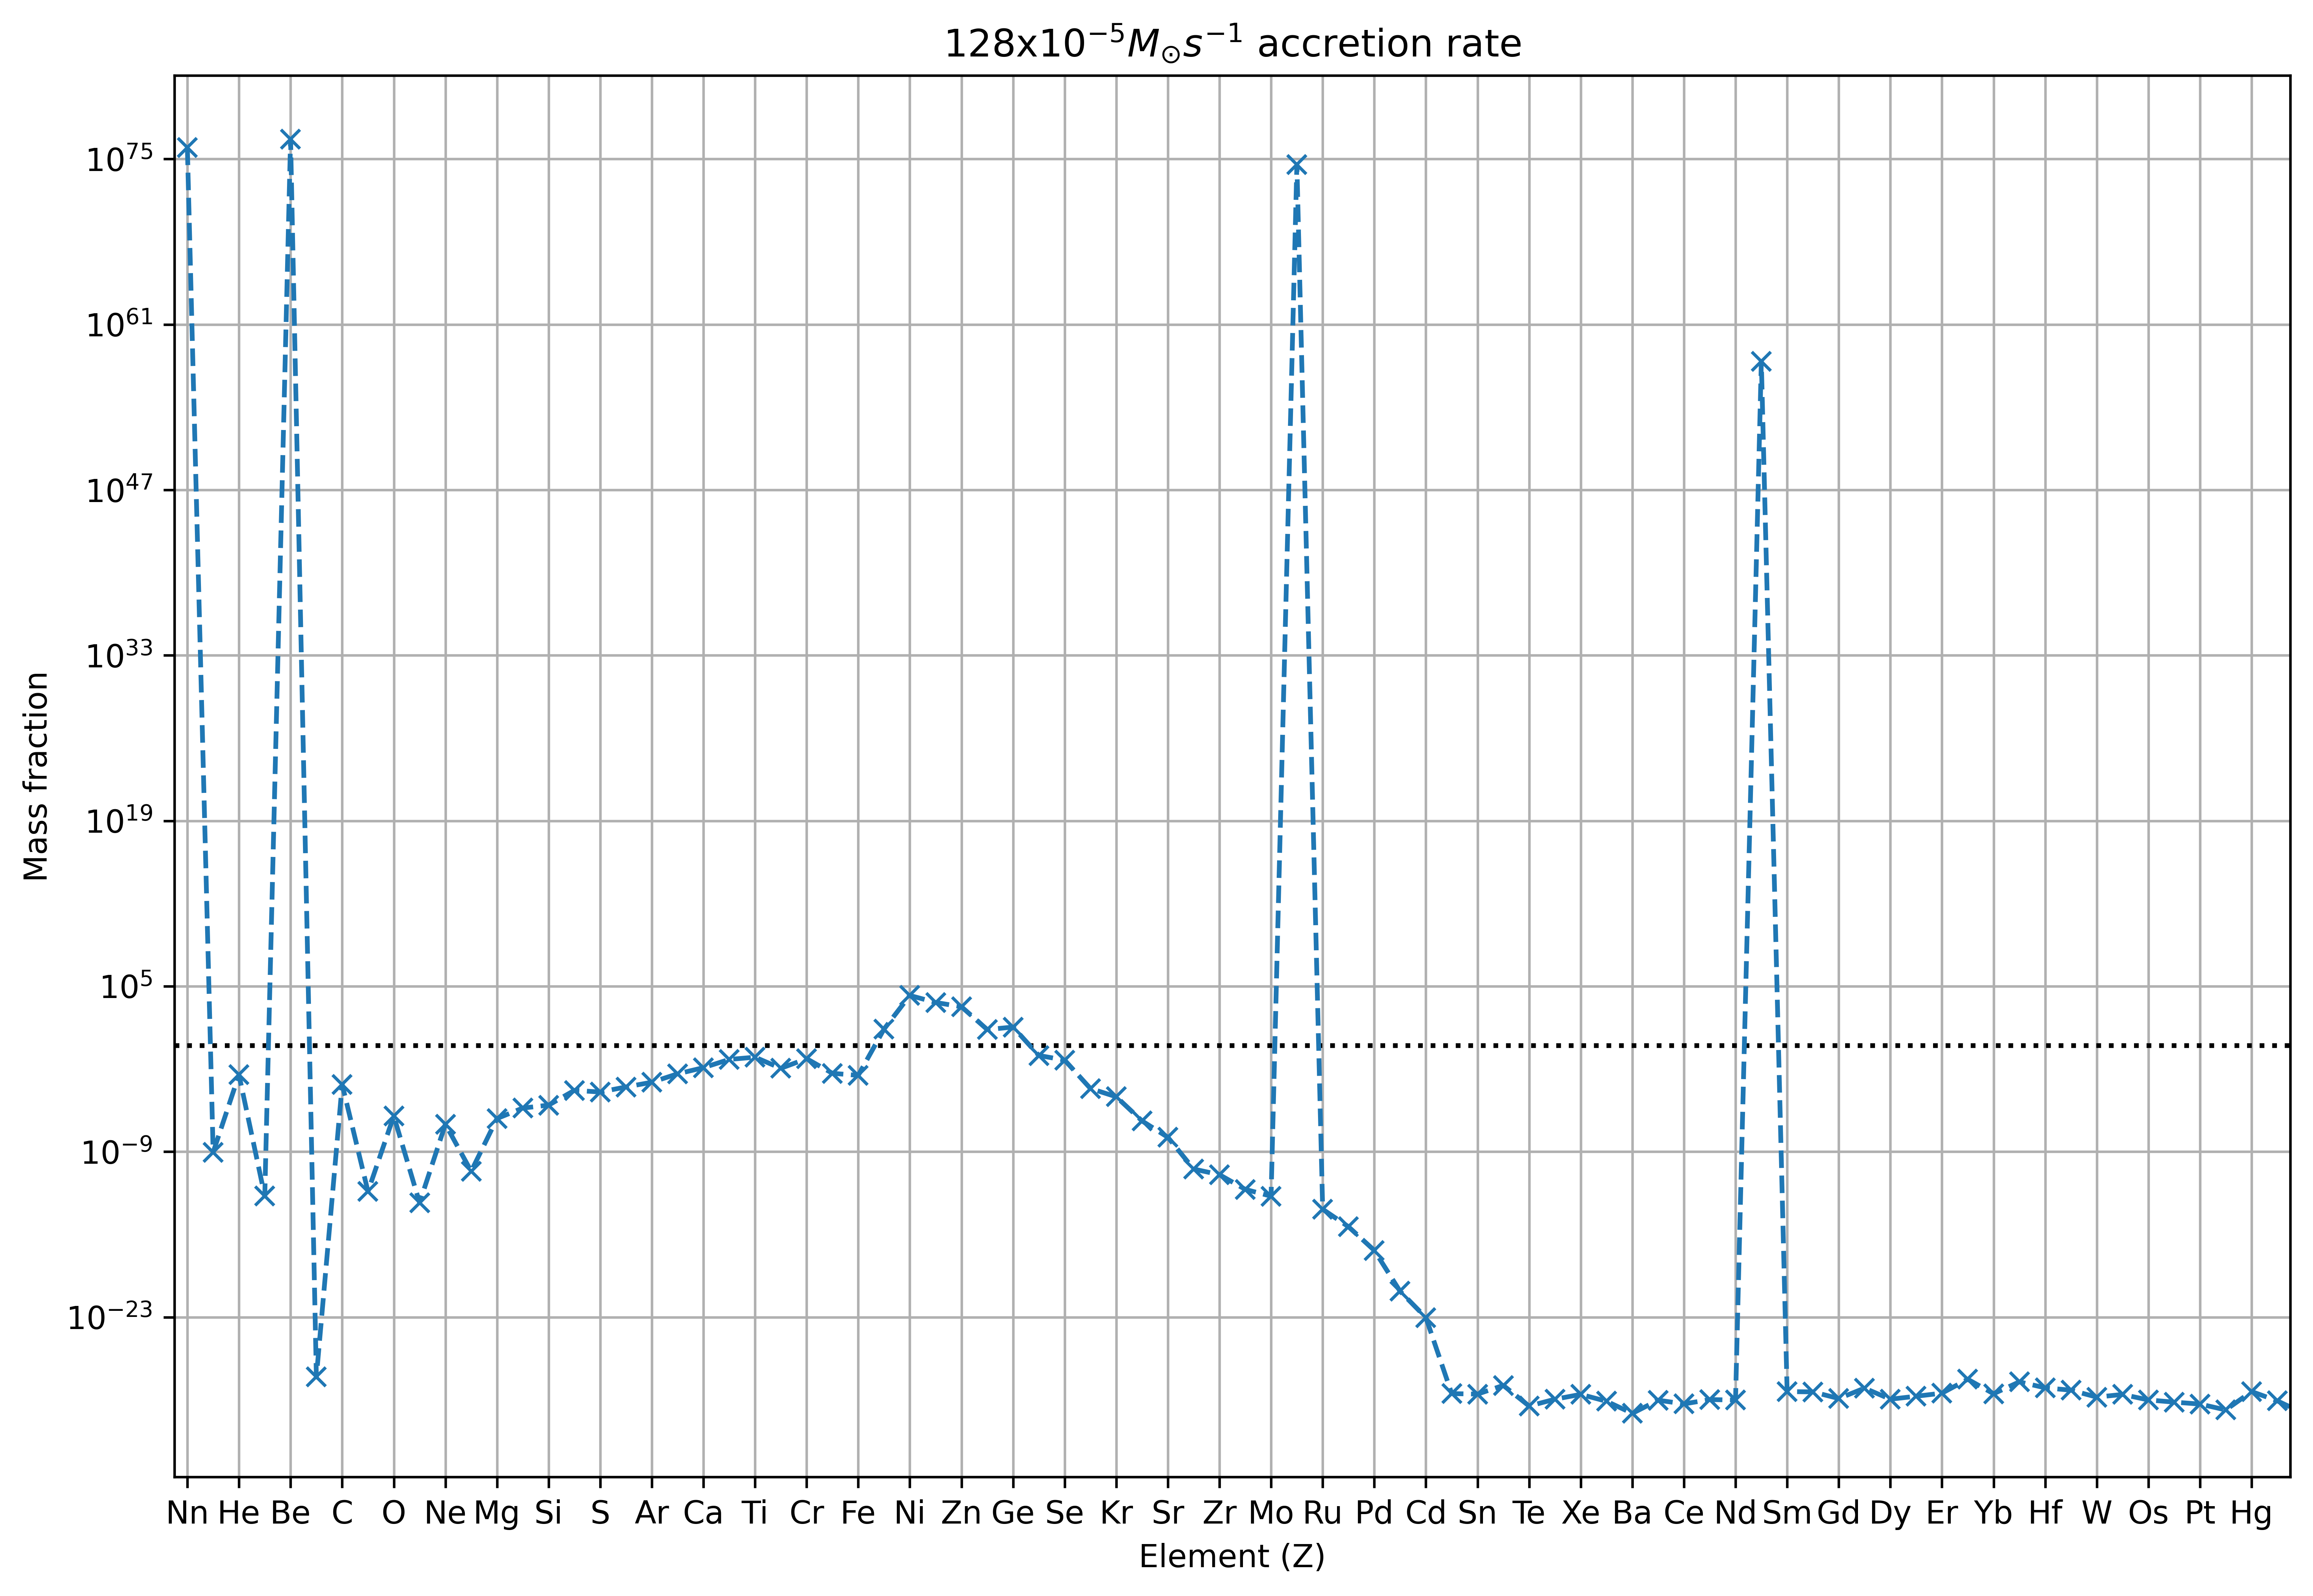

In [30]:
Timestep = -1 # -1 for final timestep
y_lim = 1e-10
y_high = 1e10
x_lim = 81.5
x_low = -0.5

fig, axs = plt.subplots(1, 1, figsize=(12,8), dpi =600)

X = []
Y = []
axs.axhline(y=1, color = 'k', linestyle = ':')

for I in range(len(All_element_MF[Timestep])):
    X.append(All_element_MF[Timestep][I][-1])
    Y.append(All_element_MF[Timestep][I][1]/All_element_MF[0][I][1])

axs.plot(X,Y, linestyle = '--', marker = 'x')
axs.xaxis.set_major_locator(MultipleLocator(2))
axs.set_yscale('log')
# axs.set_ylim(y_lim, y_high)
axs.set_xlim(x_low, x_lim)
axs.set_xlabel('Element (Z)')
axs.set_ylabel('Mass fraction')
axs.set_title('32x$10^{-5} M_{\odot}s^{-1}$ accretion rate ')
axs.grid(True)

if save_figure == True:
    plt.savefig(save_path + '/' + run_name + '_final_elemental_OP_plot.png',  bbox_inches='tight')
else:
    plt.show()

# Isotopic mass fraction plot

In [15]:
import random

def generate_colors(n):
    colors = set()
    while len(colors) < n:
        color = "#{:06x}".format(random.randint(0, 0xFFFFFF))  # Generate a random hex color
        colors.add(color)
    return list(colors)

colors = generate_colors(len(All_element_MF[0]))
print(colors)

['#25f121', '#07e84f', '#f651af', '#7851dc', '#9e21b3', '#e18008', '#8f37a4', '#d10dda', '#1ecfe1', '#23720f', '#030371', '#8a22b6', '#580405', '#646b6c', '#7cd64a', '#59a2de', '#513b81', '#8d8bd7', '#087711', '#96dfa9', '#96274b', '#4e0850', '#4826ad', '#a7b299', '#b18757', '#165116', '#c9e866', '#d4f479', '#a0c509', '#5cb3c3', '#71d701', '#362d6d', '#74df57', '#46d854', '#d4521e', '#f67b0d', '#ba32dc', '#a7d590', '#874edc', '#9fea37', '#8e541b', '#894a6a', '#c616db', '#103c8a', '#0e4256', '#679021', '#07f294', '#c56160', '#767cf7', '#b3a274', '#f9657a', '#564c74', '#cfb3ee', '#4719e1', '#beedd3', '#961ec4', '#8cbf48', '#ddf62a', '#d133ba', '#207e7c', '#89c1ac', '#a1f27a', '#7a9a5c', '#fabc1f', '#3e0854', '#a8b8a2', '#10936b', '#51f55b', '#5e6f20', '#461a86', '#8ddbe8', '#ebce17', '#126fbb', '#c1eb39', '#fb4e9f', '#f53de4', '#d536bb', '#4427b0', '#1b11c3', '#9fcfc3', '#4cfb09', '#0014fc', '#bda4b3', '#6b06a6']


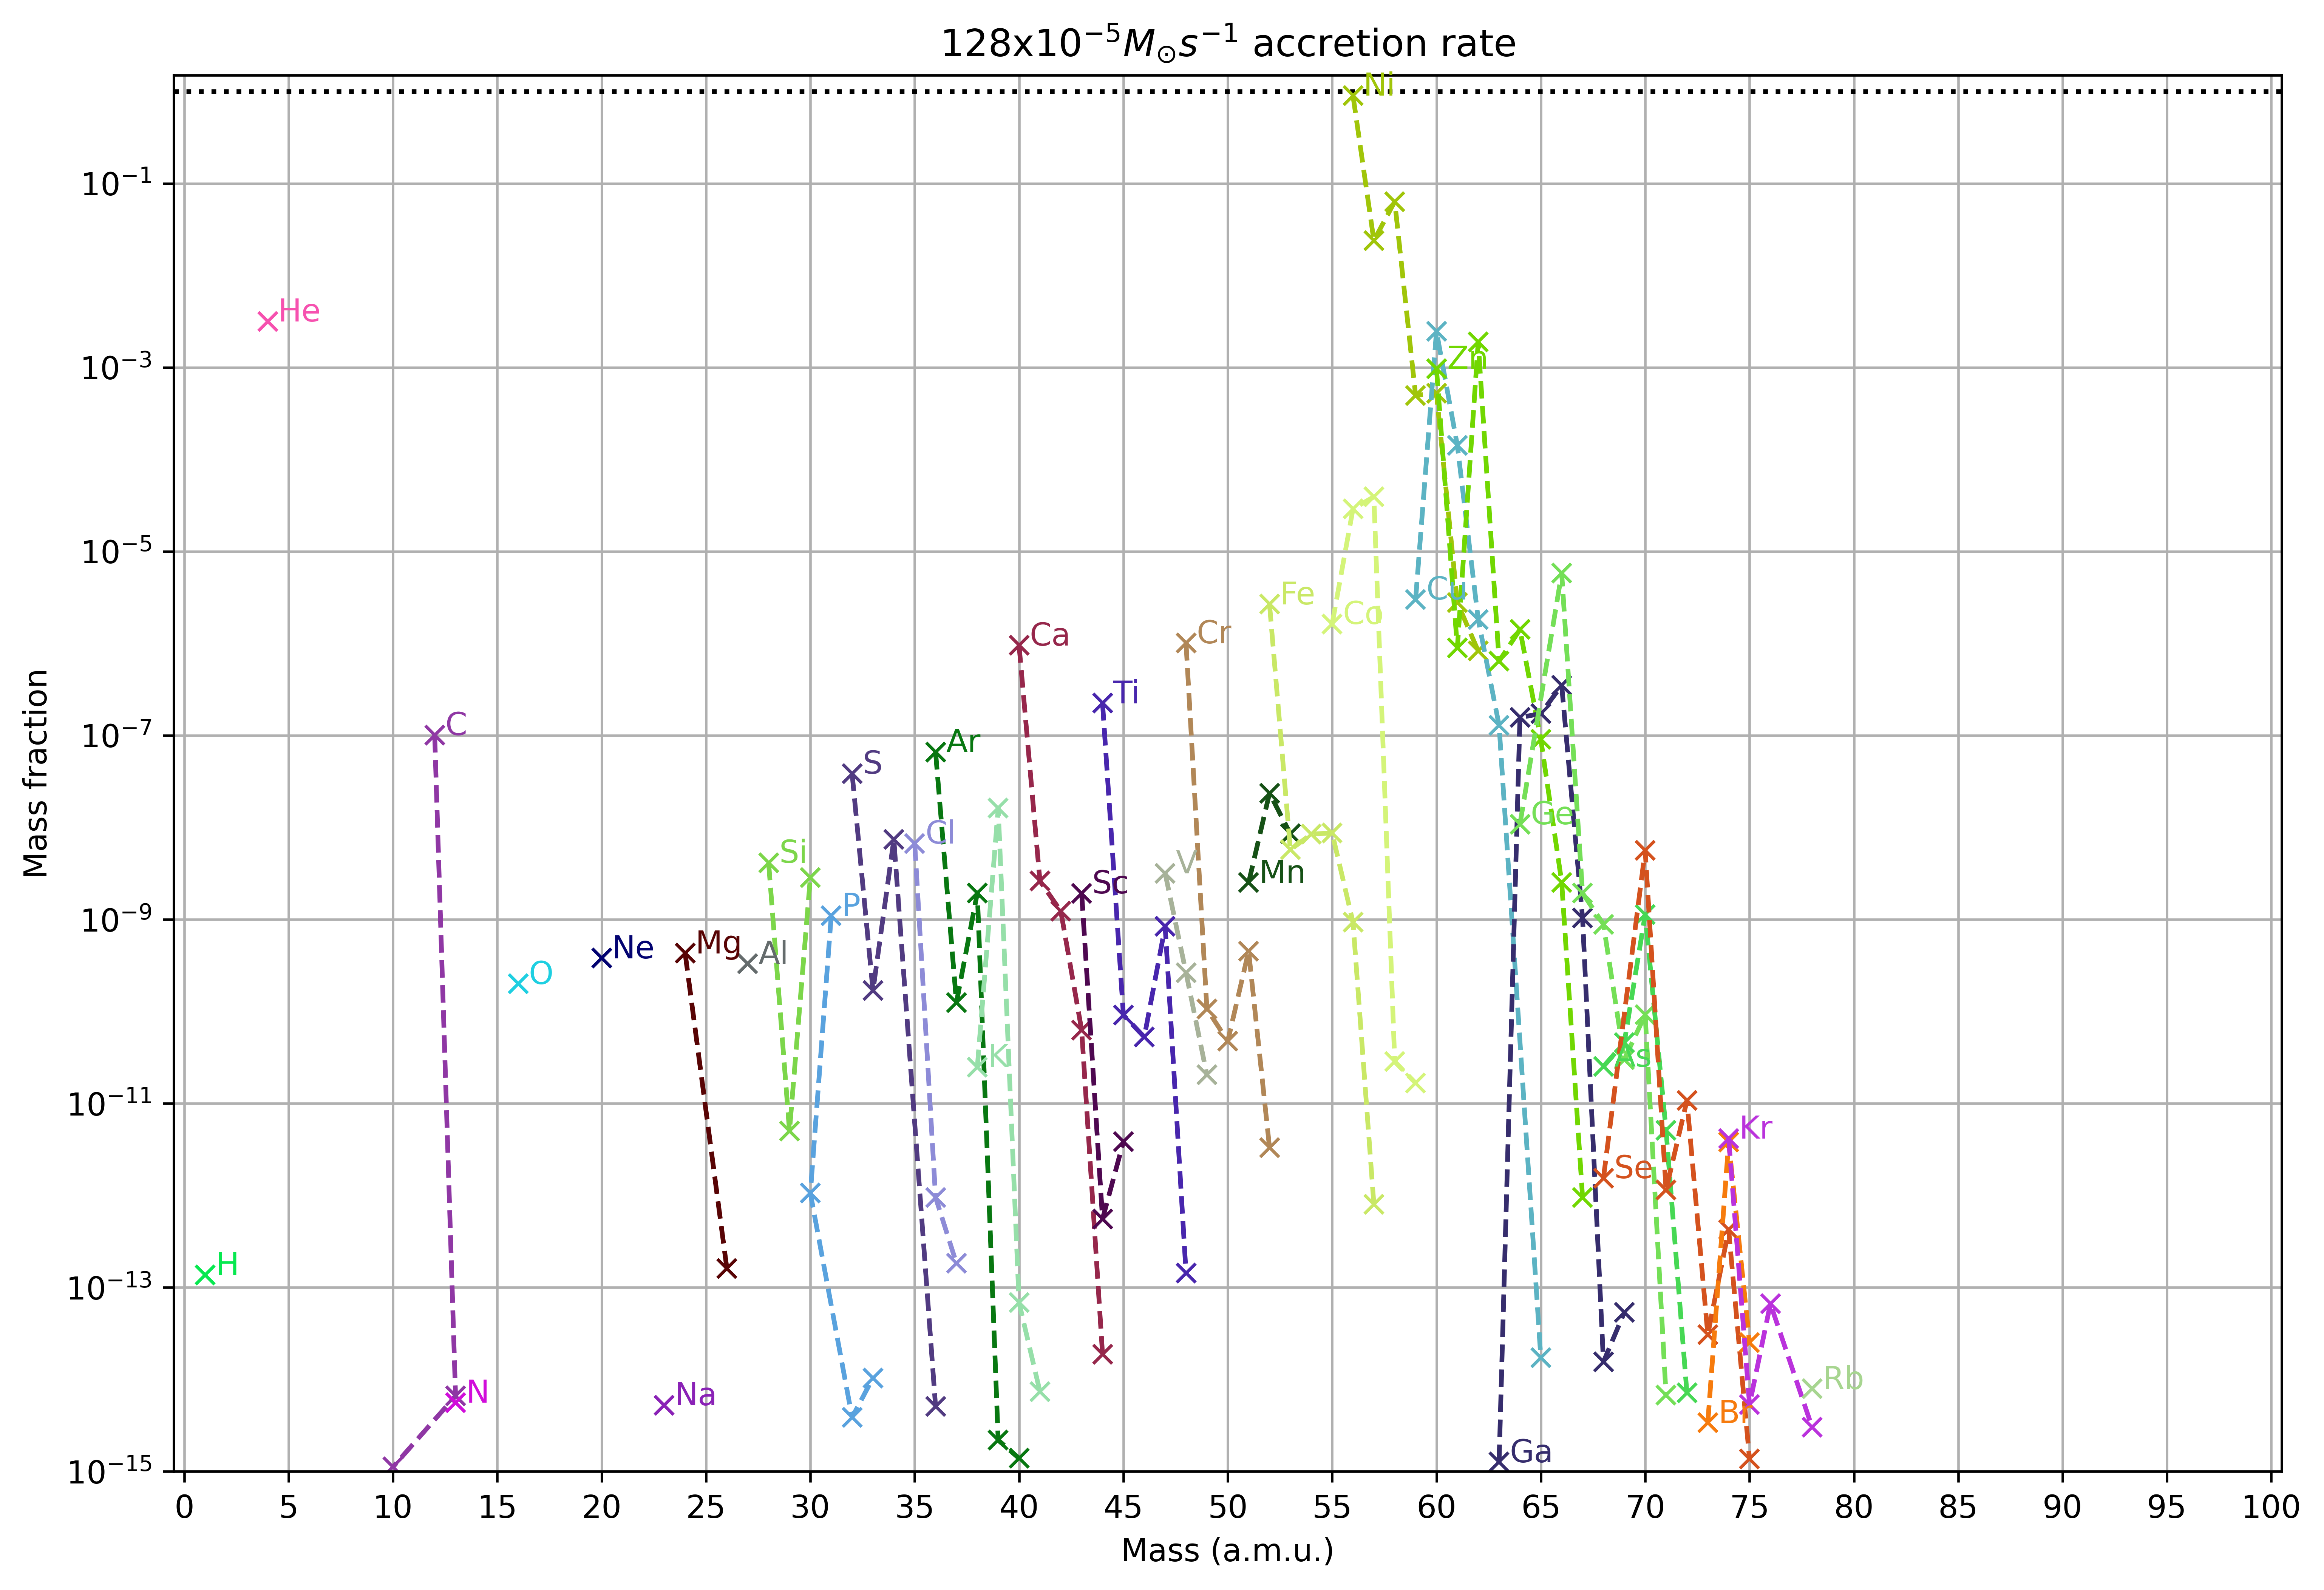

In [29]:
Timestep = -1 # -1 for final timestep
y_lim = 1e-15
y_high = 1.5
x_lim = 100.5
x_low = -0.5

fig, axs = plt.subplots(1, 1, figsize=(12,8), dpi =600)


axs.axhline(y=1, color = 'k', linestyle = ':', label = 'maximum mass fraction')
labels = []
for K in range(84):
    X = []
    Y = []
    for I in range(len(All_iso_mass[Timestep])):
        if float(All_iso_mass[Timestep][I][1]) == K:
            if float(All_iso_mass[Timestep][I][-1]) > y_lim:
                X.append(float(All_iso_mass[Timestep][I][2]))
                Y.append(float(All_iso_mass[Timestep][I][-1]))
                lab = str(ZtoSymbol(K))
    # labels.append(lab)
    if len(X) > 0 and len(Y) > 0: 
        axs.text(X[0]+0.5, Y[0], lab, color = colors[K])
    axs.plot(X,Y, color = colors[K], marker = 'x', label = lab, linestyle = '--')

axs.xaxis.set_major_locator(MultipleLocator(5))
axs.set_yscale('log')
axs.set_ylim(y_lim, y_high)
axs.set_xlim(x_low, x_lim)
# axs.legend(labels)
axs.set_xlabel('Mass (a.m.u.)')
axs.set_ylabel('Mass fraction')
axs.set_title('128x$10^{-5} M_{\odot}s^{-1}$ accretion rate')
axs.grid(True)

if save_figure == True:
    plt.savefig(save_path + '/' + run_name + '_iso_MF_plot.png',  bbox_inches='tight')
else:
    plt.show()

## Isotopic overproduction plot

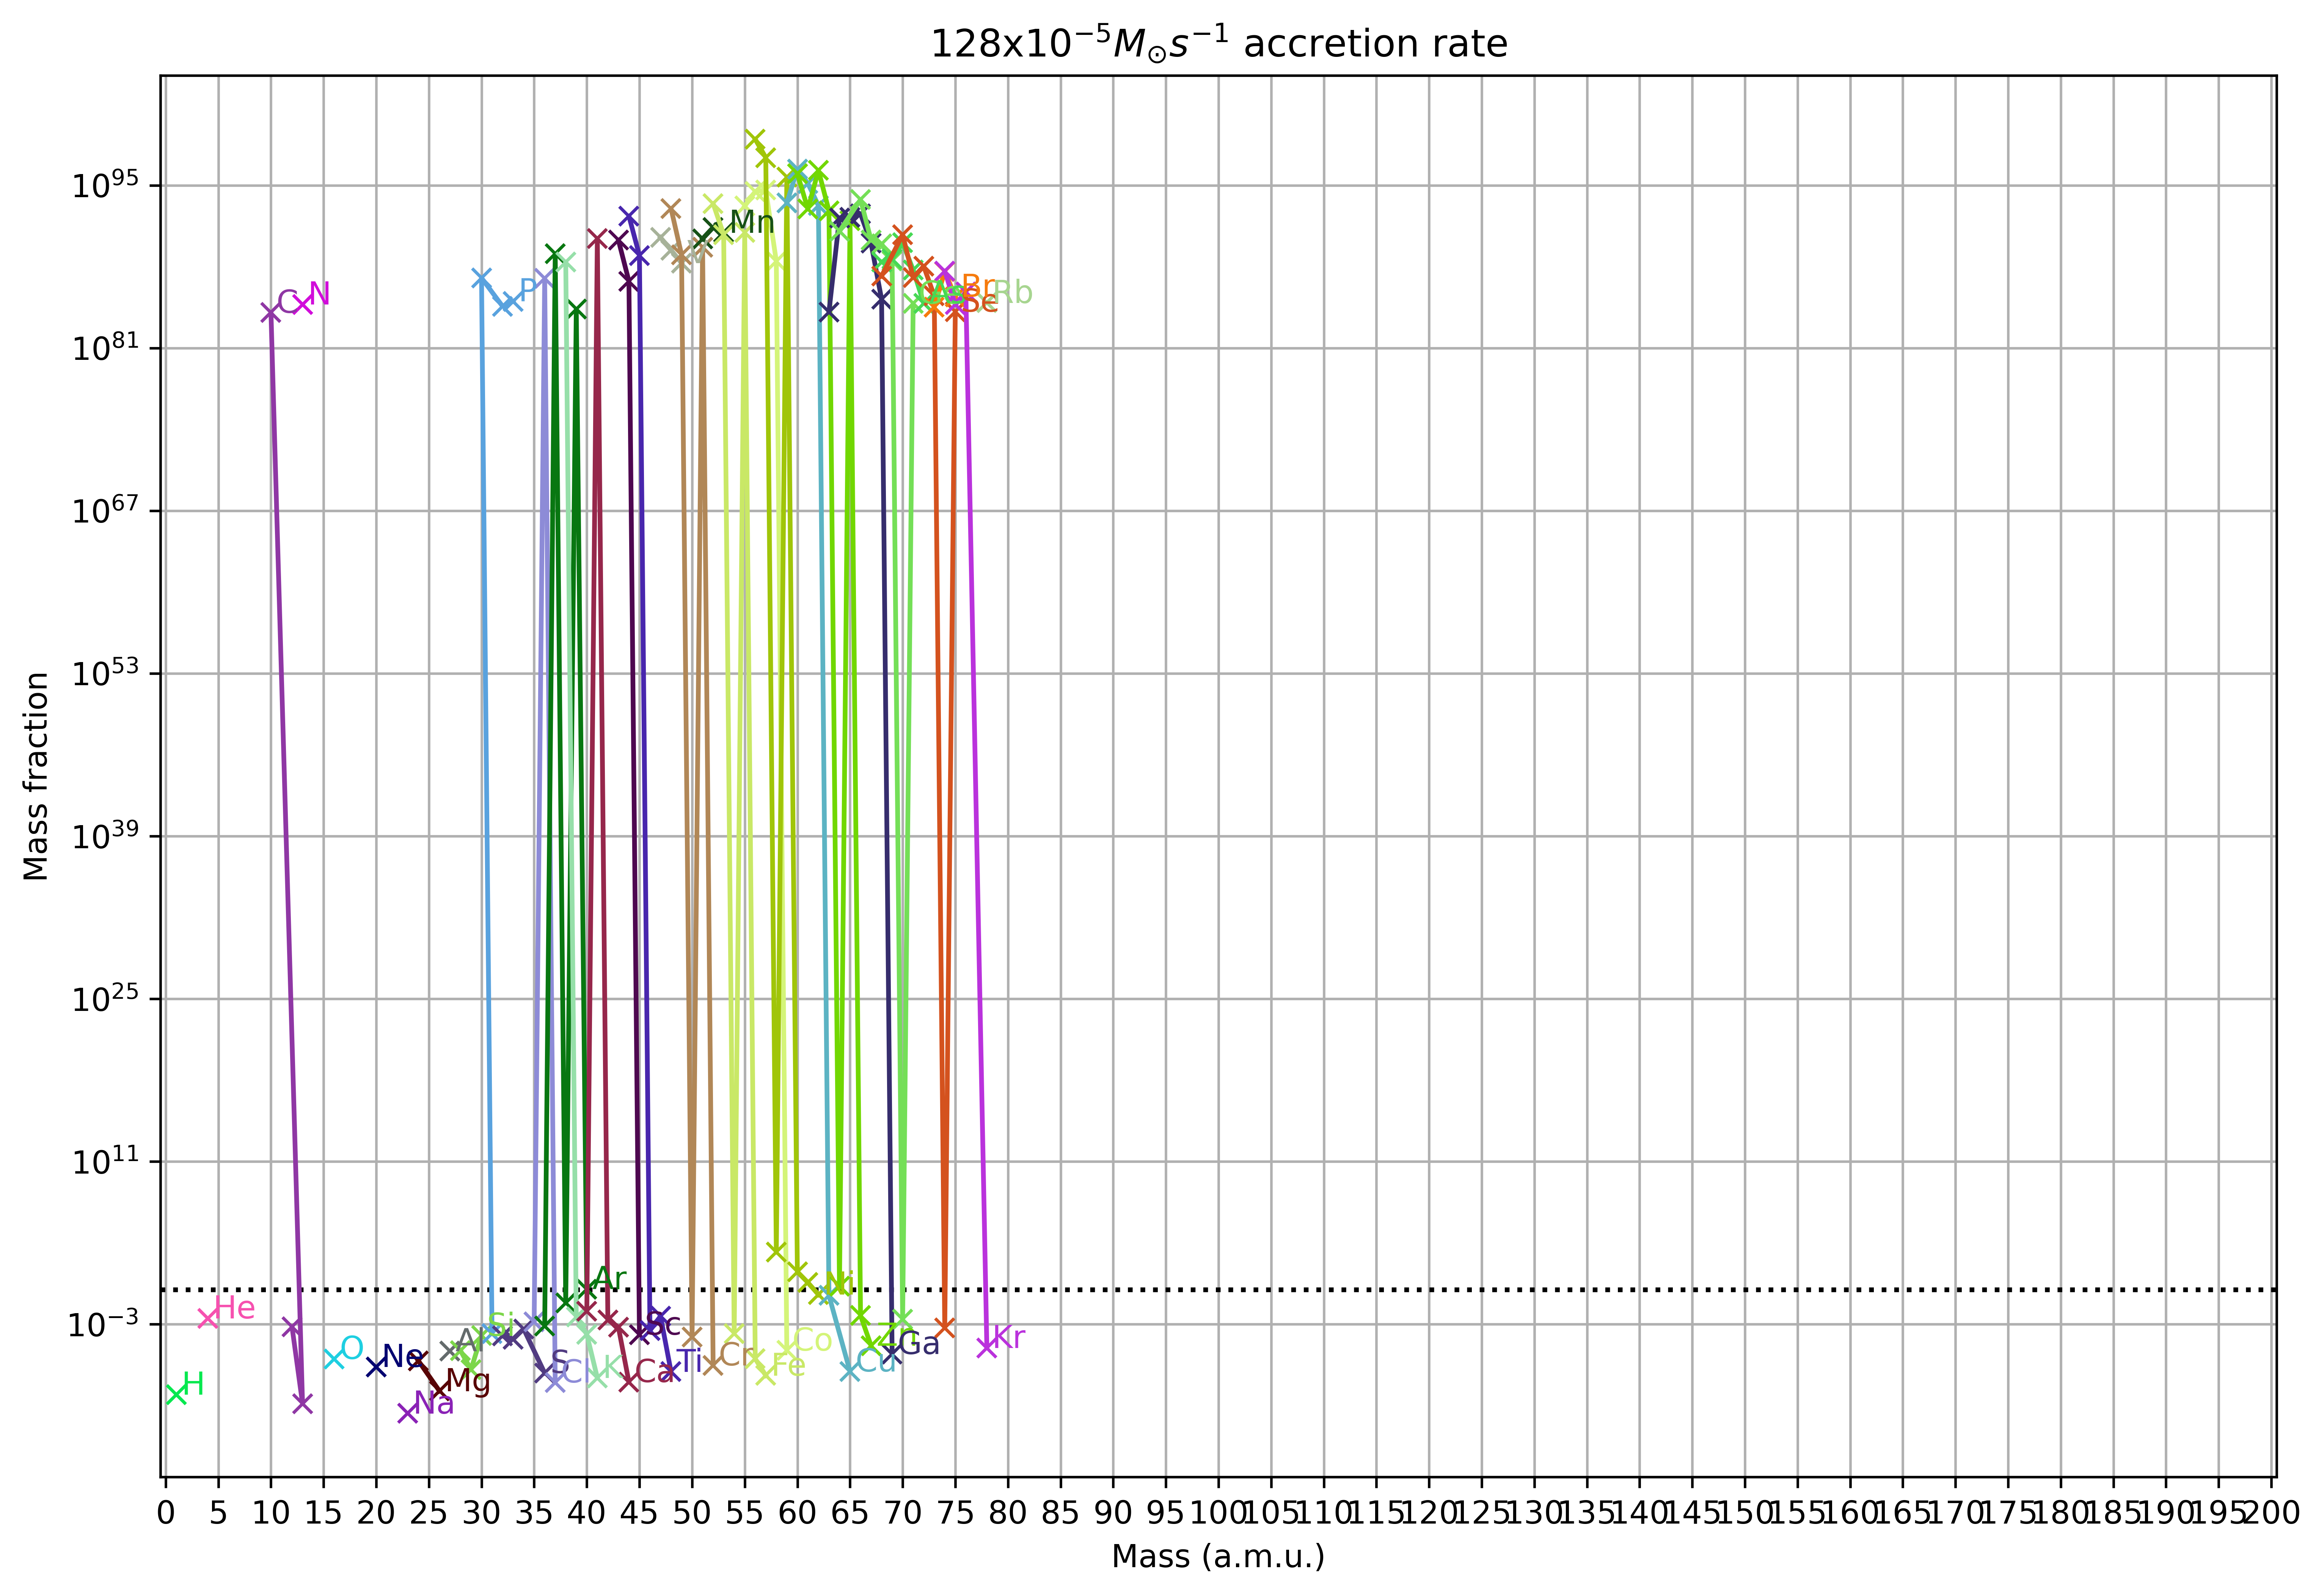

In [27]:
Timestep = -1 # -1 for final timestep
mass_lim = 1e-15 # the minimum final mass that will be allowed
y_lim = 1e-15
y_high = 1e15
x_lim = 200.5
x_low = -0.5

fig, axs = plt.subplots(1, 1, figsize=(12,8), dpi =600)


axs.axhline(y=1, color = 'k', linestyle = ':')
K = 0
for K in range(83):
    X = []
    Y = []
    for I in range(len(All_iso_mass[Timestep])):
        if float(All_iso_mass[Timestep][I][1]) == K:
            if float(All_iso_mass[Timestep][I][-1]) > mass_lim:
                X.append(float(All_iso_mass[Timestep][I][2]))
                Y.append(float(All_iso_mass[Timestep][I][-1])/float(All_iso_mass[0][I][-1]))
    lab = str(ZtoSymbol(K))
    if len(X) > 0 and len(Y) > 0: 
        axs.text(X[-1]+0.5, Y[-1], lab, color = colors[K])
    axs.plot(X,Y, color = colors[K], marker = 'x', label = lab)

axs.xaxis.set_major_locator(MultipleLocator(5))
axs.set_yscale('log')
# axs.set_ylim(y_lim, y_high)
axs.set_xlim(x_low, x_lim)
axs.set_xlabel('Mass (a.m.u.)')
axs.set_ylabel('Mass fraction')
axs.set_title('128x$10^{-5} M_{\odot}s^{-1}$ accretion rate')
axs.grid(True)

if save_figure == True:
    plt.savefig(save_path + '/' + run_name + '_iso_MF_plot.png',  bbox_inches='tight')
else:
    plt.show()

Z1 = 0
Z2 = 83
low_lim = 1e-30
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 5))
temp_x = []
temp_y = []
colors = ['r', 'b', 'g', 'k', 'm', 'c']

c =0
J = Z1
while Z1 <= J <= Z2:
    for I in range(len(ratio)):
        if float(ratio[I][1]) == float(names[J][0]):# and float(ratio[I][4]) > low_lim:
            temp_x.append(ratio[I][2])
            temp_y.append(ratio[I][4])
    ax2.plot(temp_x, temp_y, label = names[J], marker = 'x', linestyle = '--', color = colors[c])
    if len(temp_x) > 0 and len(temp_y) > 0: 
        ax2.text(temp_x[-1]+0.5, temp_y[-1], names[J][1], color = colors[c])
    temp_x = []
    temp_y = []
    c = c +1 
    if c > 5:
        c = 0
    J = J + 1
ax2.axhline(y=1, color = 'r')
ax2.set_yscale('log')
ax2.grid(True)